# **Homework 4**

*Dmitrii Annenkov*
        
The dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).
1. Use Decision Trees to predict the number of shares in social media
2. Use random forest to predict the number of shares in social media

In [1]:
## Import Library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import requests
import io

%matplotlib inline

In [2]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv('Online News Popularity.csv', skipinitialspace=True)
df.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.559889,1.0,0.698198,2,2,0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731,8,960,0.418163,1.0,0.549834,21,20,20,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731,12,989,0.433574,1.0,0.572108,20,20,20,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731,11,97,0.670103,1.0,0.836735,2,0,0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731,10,231,0.636364,1.0,0.797101,4,1,1,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  int64  
 2   n_tokens_title                 39644 non-null  int64  
 3   n_tokens_content               39644 non-null  int64  
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  int64  
 8   num_self_hrefs                 39644 non-null  int64  
 9   num_imgs                       39644 non-null  int64  
 10  num_videos                     39644 non-null  int64  
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [5]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


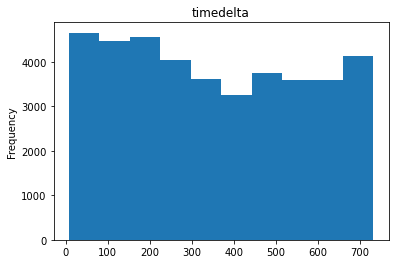

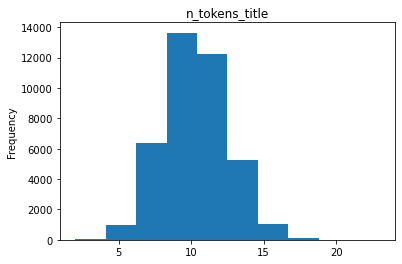

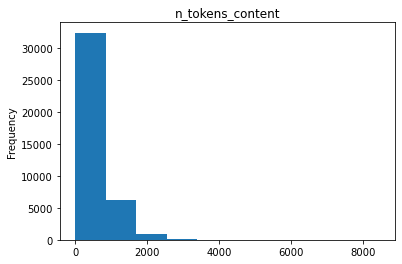

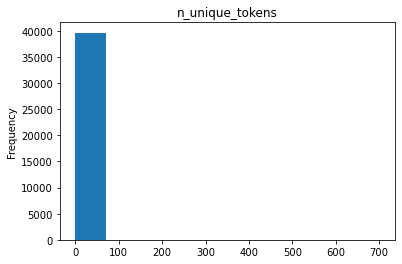

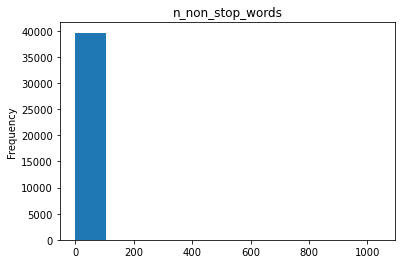

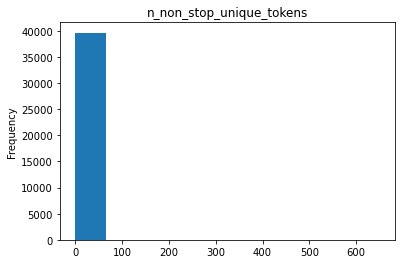

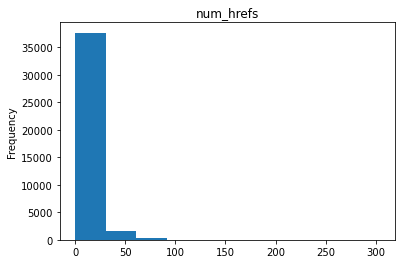

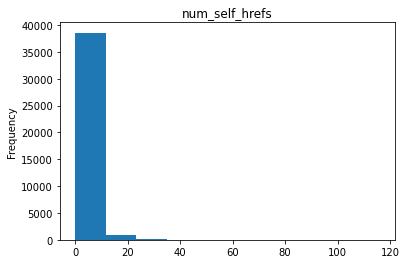

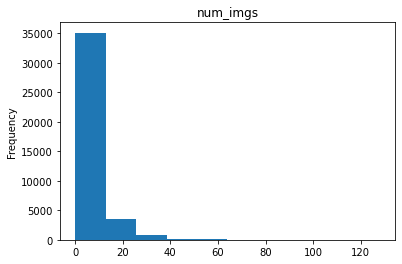

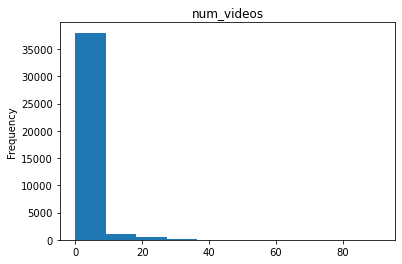

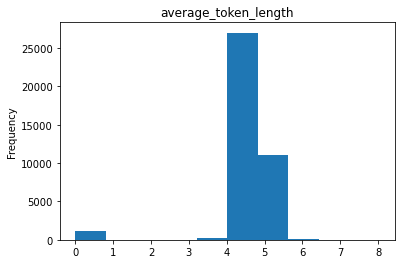

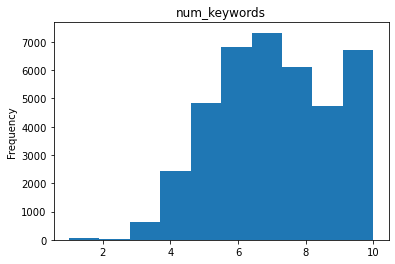

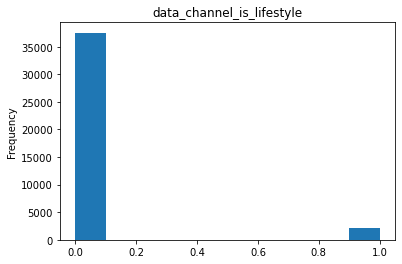

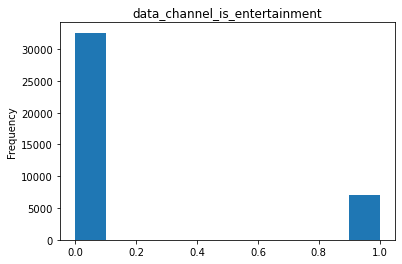

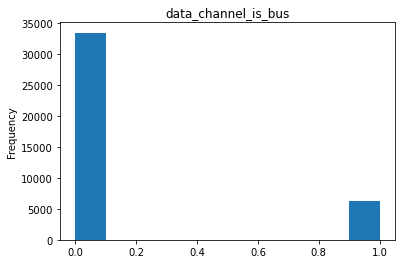

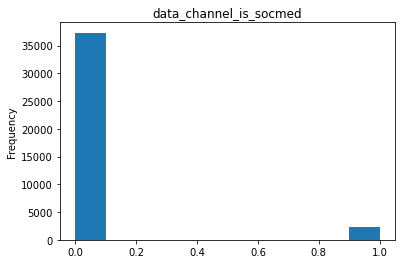

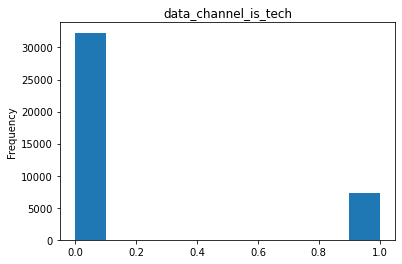

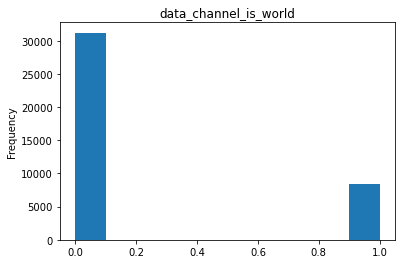

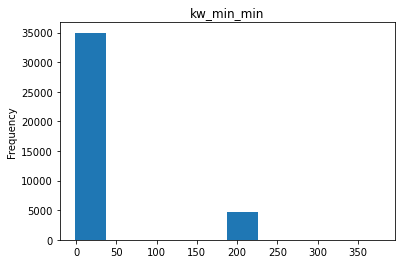

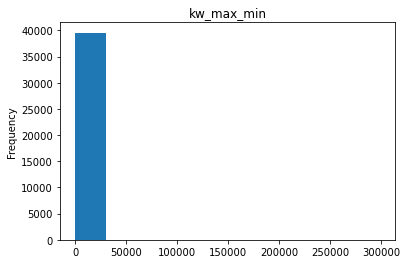

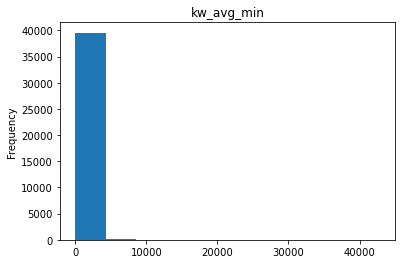

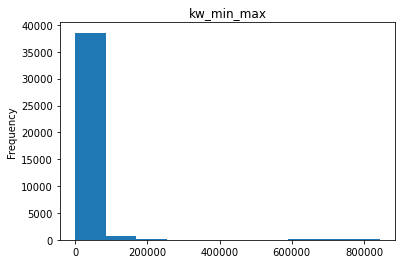

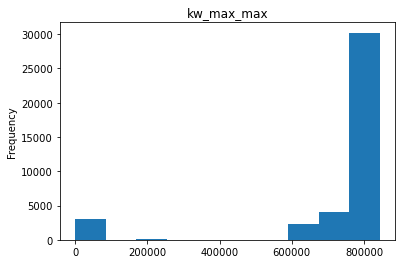

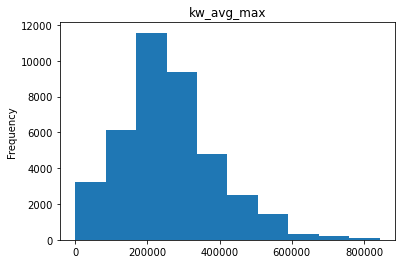

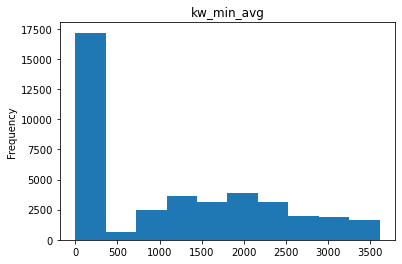

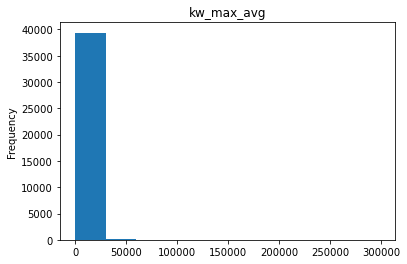

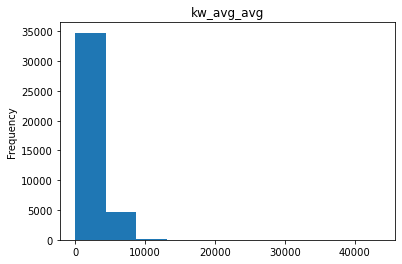

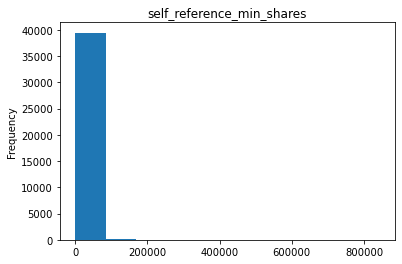

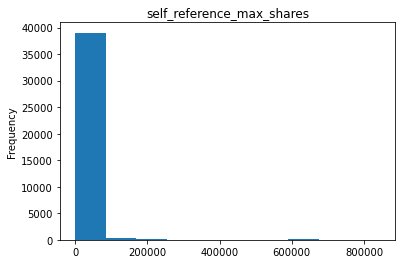

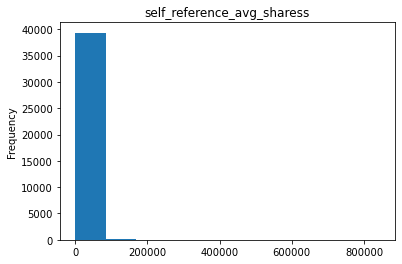

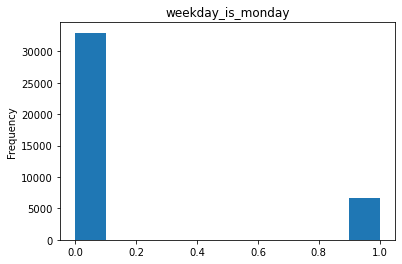

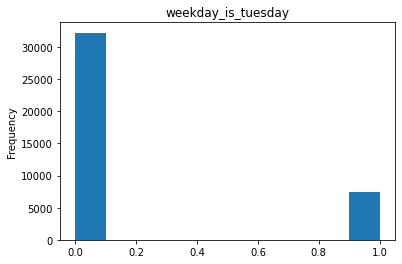

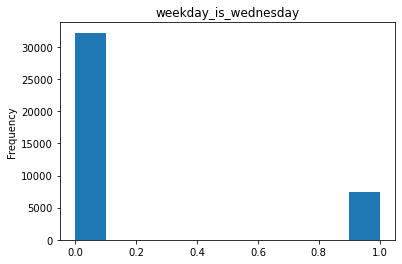

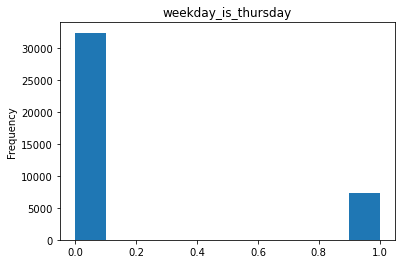

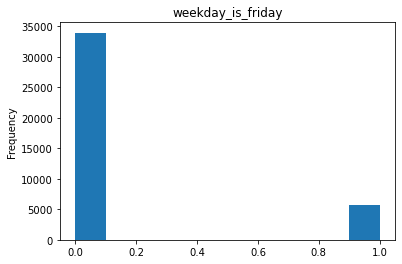

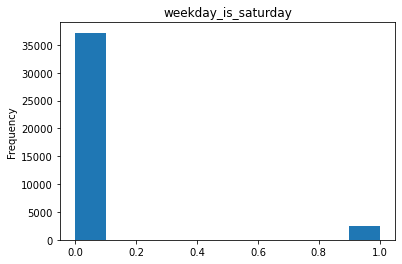

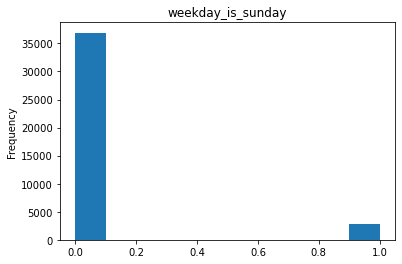

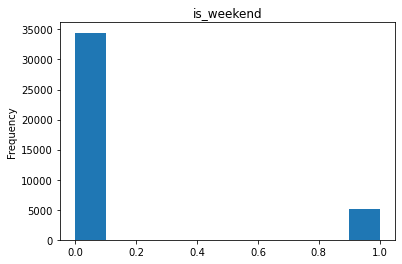

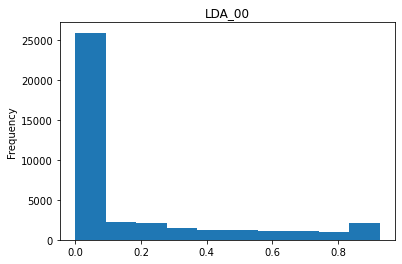

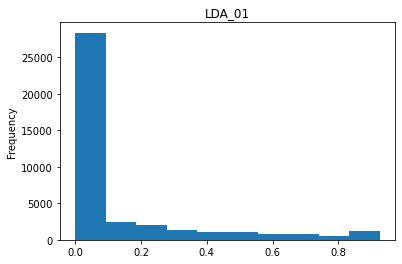

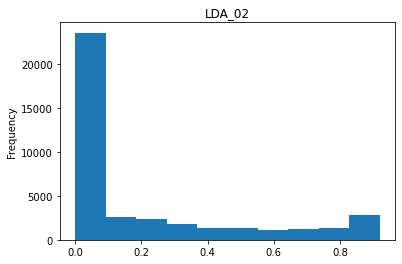

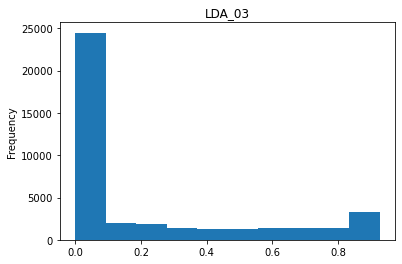

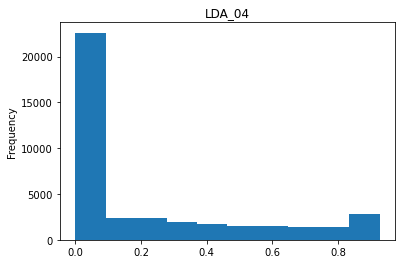

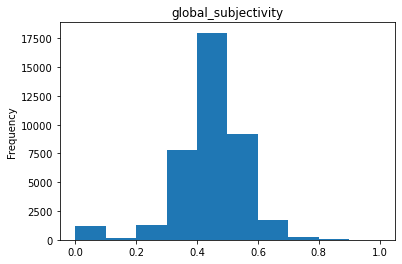

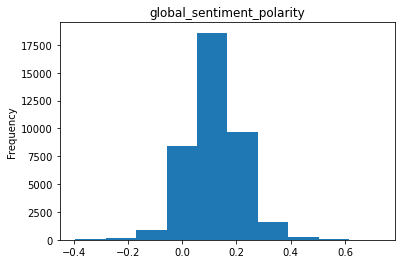

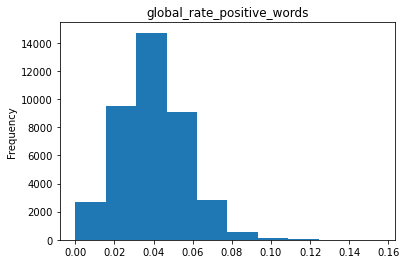

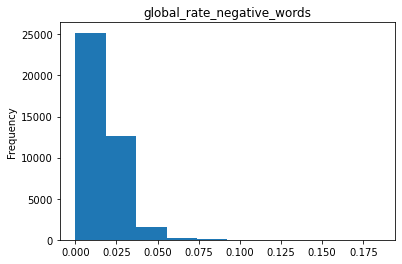

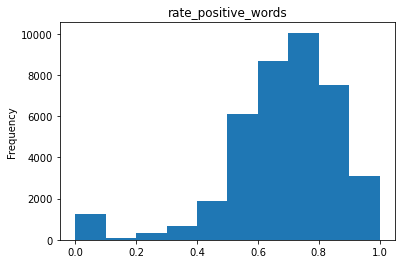

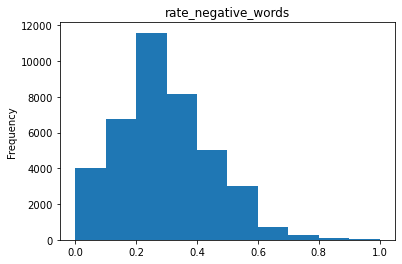

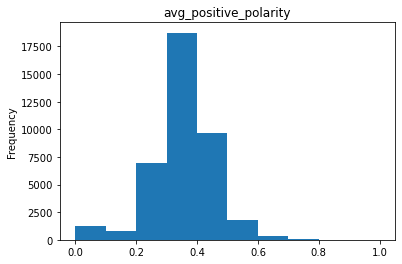

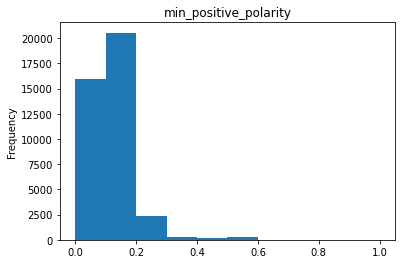

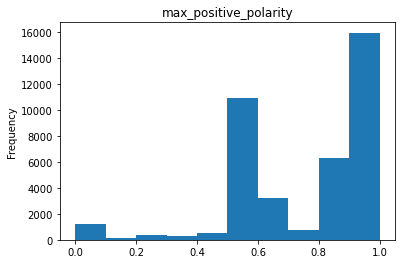

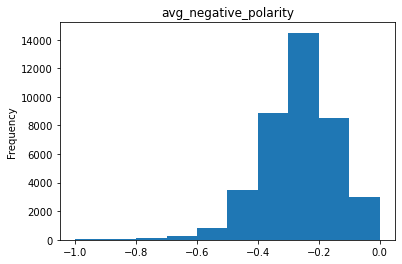

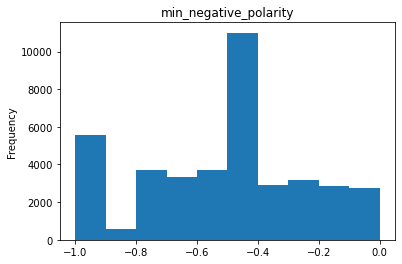

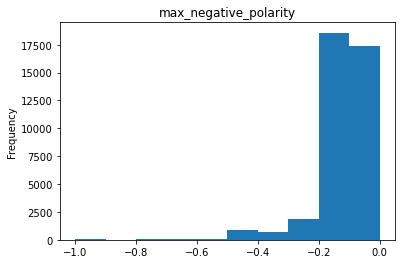

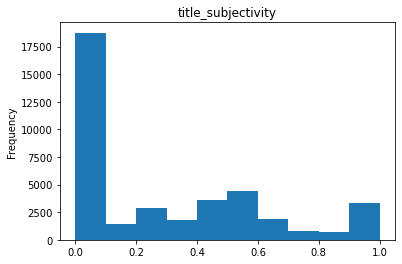

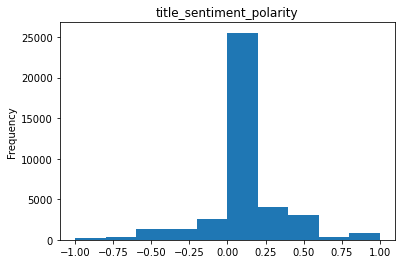

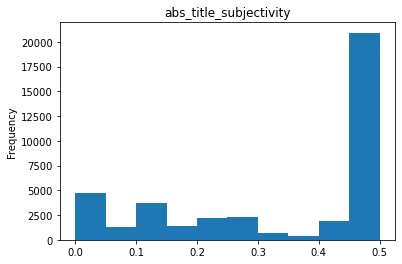

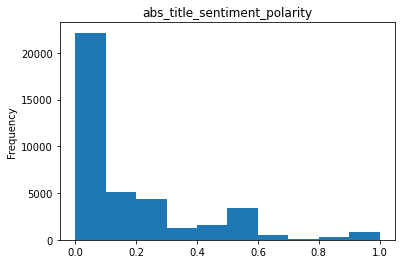

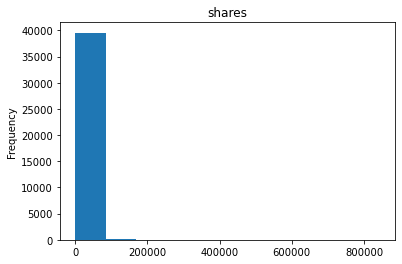

In [6]:
for column in df:
  if is_numeric_dtype(df[column]):
      plt.figure(column)
      plt.title(column)
      df[column].plot(kind = 'hist')


In [7]:
df.skew(axis = 0, skipna = True).sort_values()

/var/folders/yv/4ng2rnns3nn8ynp131yyfk9m0000gn/T/ipykernel_43239/3969261199.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True).sort_values()


average_token_length              -4.576012
max_negative_polarity             -3.459747
kw_max_max                        -2.644982
rate_positive_words               -1.423106
global_subjectivity               -1.372689
max_positive_polarity             -0.939756
avg_positive_polarity             -0.724795
abs_title_subjectivity            -0.624149
avg_negative_polarity             -0.551644
num_keywords                      -0.147251
min_negative_polarity             -0.073155
global_sentiment_polarity          0.105457
timedelta                          0.120504
n_tokens_title                     0.165320
global_rate_positive_words         0.323047
title_sentiment_polarity           0.396109
rate_negative_words                0.407241
kw_min_avg                         0.467976
kw_avg_max                         0.624310
title_subjectivity                 0.816085
LDA_04                             1.173129
LDA_03                             1.238716
LDA_02                          

In [8]:
df.var().sort_values()

/var/folders/yv/4ng2rnns3nn8ynp131yyfk9m0000gn/T/ipykernel_43239/354554810.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var().sort_values()


global_rate_negative_words       1.172411e-04
global_rate_positive_words       3.037581e-04
min_positive_polarity            5.085819e-03
max_negative_polarity            9.096006e-03
global_sentiment_polarity        9.395553e-03
avg_positive_polarity            1.092907e-02
global_subjectivity              1.361531e-02
avg_negative_polarity            1.631386e-02
rate_negative_words              2.438466e-02
abs_title_subjectivity           3.564197e-02
rate_positive_words              3.617845e-02
LDA_01                           4.827131e-02
data_channel_is_lifestyle        5.014418e-02
abs_title_sentiment_polarity     5.120906e-02
data_channel_is_socmed           5.516435e-02
weekday_is_saturday              5.804856e-02
max_positive_polarity            6.139776e-02
weekday_is_sunday                6.427463e-02
LDA_00                           6.915570e-02
title_sentiment_polarity         7.046382e-02
LDA_02                           7.960592e-02
LDA_04                           8

In [9]:
target = 'shares'
predictors = ['timedelta', 'n_tokens_title', 'n_tokens_content',
              'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
              'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
              'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
              'data_channel_is_entertainment', 'data_channel_is_bus',
              'data_channel_is_socmed', 'data_channel_is_tech',
              'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
              'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
              'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
              'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
              'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
              'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
              'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
              'global_sentiment_polarity', 'global_rate_positive_words',
              'global_rate_negative_words', 'rate_positive_words',
              'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
              'max_positive_polarity', 'avg_negative_polarity',
              'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
              'title_sentiment_polarity', 'abs_title_subjectivity',
              'abs_title_sentiment_polarity']

X = df[predictors]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [10]:
dt_regressor = DecisionTreeRegressor(splitter='best', random_state=0)
cross_val_score(dt_regressor, X_train, y_train, cv=10)

array([-11.56945663,  -7.91616763,  -1.38287788,  -0.58481845,
        -0.65154425,  -4.50556979,  -4.04525098,  -3.90837107,
        -7.59151981,  -5.45282965])

In [11]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [12]:
y_pred = dt_regressor.predict(X_test)

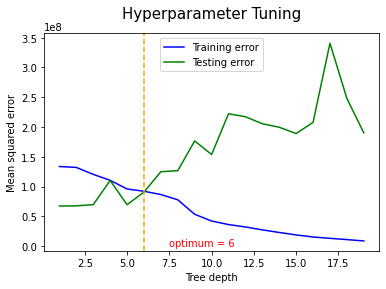

In [13]:
max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=6, color='orange', linestyle='--')
plt.annotate('optimum = 6', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()